## prepare the libraries for ploting

In [1]:
# http://matplotlib.org/
import matplotlib.pyplot as plt
from matplotlib import ticker
%matplotlib inline

In [2]:
import numpy as np

# import OC python interface

In [3]:
from libocpy import *

## initiate OC 

In [4]:
tqini()

## read the database with selected element(s)

In [5]:
tqrpfil('FENI.TDB',('FE','NI'))

## DEMO: the name of all the loaded elements

In [ ]:
element_name = tqgcom()
print "element name:  ",element_name

## DEMO: number of phases

In [ ]:
number_phase = tqgnp()
print "# of phases:   ",number_phase

## DEMO: name of the phases

In [ ]:
phase_name = tqgpn()
print "phase name:  ",phase_name

## DEMO: phase index

In [ ]:
phase_index = tqgpi('liq')
print "phase index:  ",phase_index

## DEMO: change phase status

In [ ]:
tqphsts("*","SUS",0.)
tqphsts("FCC","ENT",1.)

# setup conditions

In [6]:
tqsetc('N',0,1.)
tqsetc('P',0,1E5)
tqsetc('T',0,300.)

tqsetc('X','NI',0.1)

## DEMO: equalibrium calculation

In [ ]:
tqce()

## DEMO: get results from calculation -- molar free energy

In [ ]:
GM = tqgetv('NP','FCC','NA')
print GM

## load data calculated using Thermocalc

In [7]:
tc_fcc = np.loadtxt('tc/fcc_2ph.dat')  # A1 + A1#2
tc_bcc = np.loadtxt('tc/bcc.dat')
tc_liq = np.loadtxt('tc/liq.dat')

## step calculation

In [8]:
import numpy as np

T = np.linspace(300,1500,100)

In [9]:
tqphsts("*","SUS",0.)
tqphsts("FCC","ENT",1.)

GM_FCC = []
for i in range(len(T)):
    tqsetc('T',0,T[i])
    tqce()
    
    GM_FCC.append(tqgetv('GM','*','NA'))

In [10]:
tqphsts("*","SUS",0.)
tqphsts("BCC","ENT",1.)

GM_BCC = []
for i in range(len(T)):
    tqsetc('T',0,T[i])
    tqce()
    
    GM_BCC.append(tqgetv('GM','BCC','NA'))

In [11]:
tqphsts("*","SUS",0.)
tqphsts("LIQ","ENT",1.)

GM_LIQ = []   
for i in range(len(T)):
    tqsetc('T',0,T[i])
    tqce()
    
    GM_LIQ.append(tqgetv('GM','LIQ','NA'))

## plot

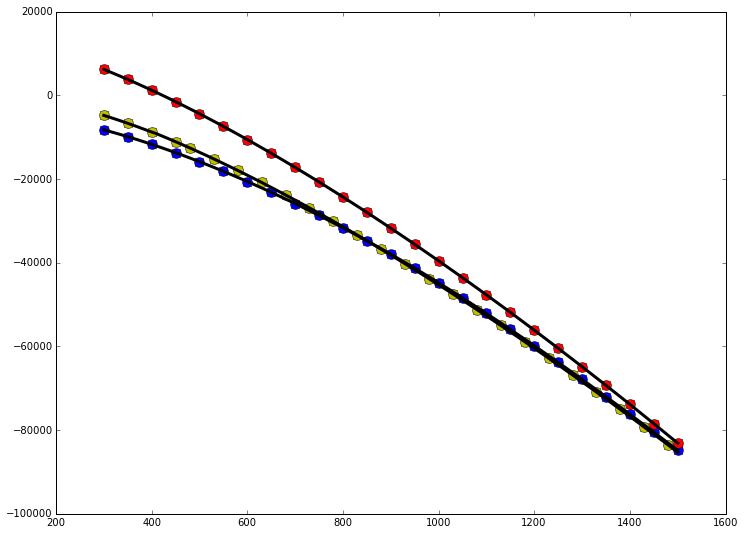

In [12]:
fig, ax = plt.subplots(figsize=(12, 9))
ax.plot(T,GM_FCC,c='k',lw=3,zorder=5)
ax.plot(tc_fcc[:,0],tc_fcc[:,1],'o',markersize=10,c='y',markevery=5)    # A1 + A1#2


ax.plot(T,GM_BCC,c='k',lw=3,zorder=5)
ax.plot(tc_bcc[:,0],tc_bcc[:,1],'o',markersize=10,c='b',markevery=5)
ax.plot(T,GM_LIQ,c='k',lw=3,zorder=5)
ax.plot(tc_liq[:,0],tc_liq[:,1],'o',markersize=10,c='r',markevery=5)


plt.show()

## PyCALPHAD

In [13]:
from pycalphad import calculate, equilibrium, Database, binplot
import pycalphad.variables as v

db_ = Database('FENI_pc.TDB')
my_phases_ = ['LIQUID','FCC_A1','BCC_A2']

In [14]:
pyceq_fcc = equilibrium(db_, ['FE', 'NI', 'VA'], 'FCC_A1', {v.X('NI'): 0.1, v.T: (300, 1500, 30), v.P: 100000})

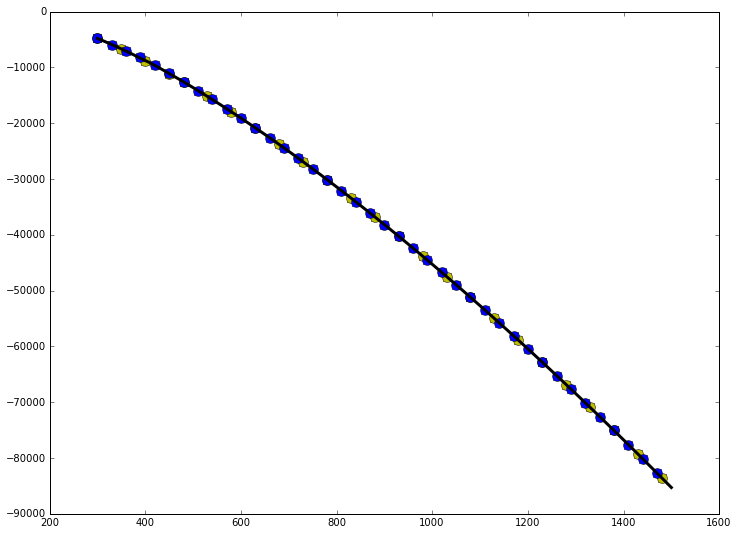

In [15]:
fig, ax = plt.subplots(figsize=(12, 9))
ax.plot(T,GM_FCC,c='k',lw=3,zorder=5)
ax.plot(tc_fcc[:,0],tc_fcc[:,1],'o',markersize=10,c='y',markevery=5)    # A1 + A1#2
ax.plot(pyceq_fcc['T'],pyceq_fcc['GM'][0],'o',markersize=10,c='b')

plt.show()

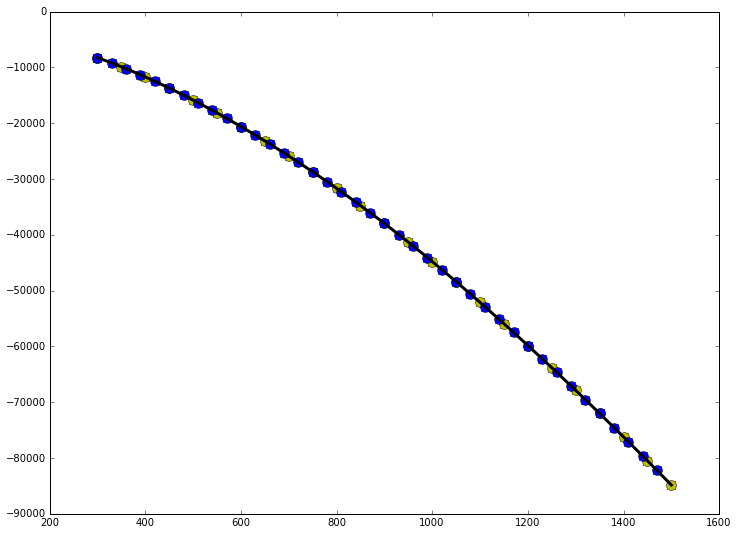

In [16]:
pyceq_bcc = equilibrium(db_, ['FE', 'NI', 'VA'], 'BCC_A2', {v.X('NI'): 0.1, v.T: (300, 1500, 30), v.P: 100000})

fig, ax = plt.subplots(figsize=(12, 9))
ax.plot(T,GM_BCC,c='k',lw=3,zorder=5)
ax.plot(tc_bcc[:,0],tc_bcc[:,1],'o',markersize=10,c='y',markevery=5)
ax.plot(pyceq_bcc['T'],pyceq_bcc['GM'][0],'o',markersize=10,c='b')

plt.show()

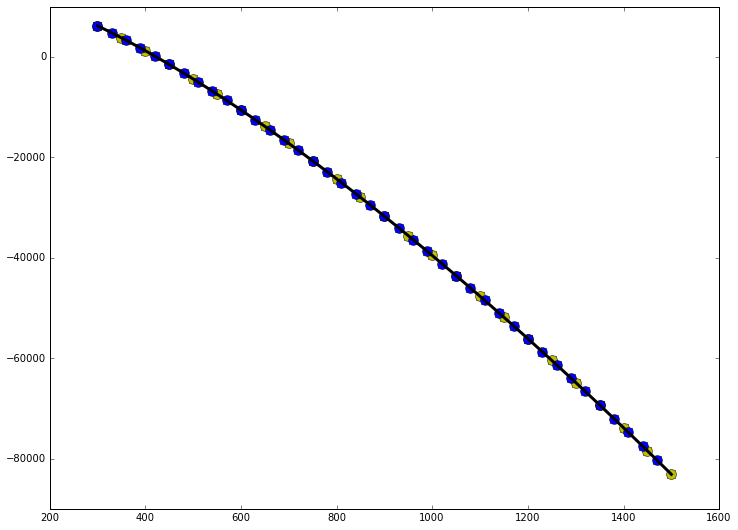

In [17]:
pyceq_liq = equilibrium(db_, ['FE', 'NI', 'VA'], 'LIQUID', {v.X('NI'): 0.1, v.T: (300, 1500, 30), v.P: 100000})

fig, ax = plt.subplots(figsize=(12, 9))
ax.plot(T,GM_LIQ,c='k',lw=3,zorder=5)
ax.plot(tc_liq[:,0],tc_liq[:,1],'o',markersize=10,c='y',markevery=5)
ax.plot(pyceq_liq['T'],pyceq_liq['GM'][0],'o',markersize=10,c='b')

plt.show()

# reset error

In [ ]:
tqrseterr()